# WeatherPy

## Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

## Create variables for API values

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
def latitudes(size):
    latitudes = []
    x = 0
    for x in range(size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

2.62 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
# Create a list for holding city values
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then add it to the 'cities' list
    if city not in cities:
        cities.append(city)
        
# Print the length of cities list to ensure sufficient count.
len(cities)
    

619

## Build URL with API Key

In [6]:
# make an API call fro mOpenWeather site
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Create Empty Lists for Each Set of API Pulls

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. 
    # Replace spaces with "+" to avoid breaking the link for cities with multiples words in the name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | viedma
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | vaitape
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | novyy yegorlyk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | muncar
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | riyadh
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | hun
Processing R

Processing Record 41 of Set 4 | bubaque
Processing Record 42 of Set 4 | meyungs
City not found. Skipping...
Processing Record 43 of Set 4 | ouesso
Processing Record 44 of Set 4 | djambala
Processing Record 45 of Set 4 | bereda
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | kuche
City not found. Skipping...
Processing Record 48 of Set 4 | hastings
Processing Record 49 of Set 4 | praia
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | altay
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | san carlos de bariloche
Processing Record 5 of Set 5 | rabo de peixe
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | changying
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | meulaboh
Processing Record 10 of Set 5 | asau
Processing Record 11 of Set 5 | caxito
Processing R

Processing Record 28 of Set 8 | boende
Processing Record 29 of Set 8 | nome
Processing Record 30 of Set 8 | cortez
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | dwarka
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | hasaki
Processing Record 35 of Set 8 | ilhabela
Processing Record 36 of Set 8 | el porvenir
Processing Record 37 of Set 8 | maposeni
Processing Record 38 of Set 8 | marzuq
Processing Record 39 of Set 8 | iquitos
Processing Record 40 of Set 8 | vrutky
Processing Record 41 of Set 8 | murdochville
Processing Record 42 of Set 8 | tuatapere
Processing Record 43 of Set 8 | miyako
Processing Record 44 of Set 8 | sumenep
Processing Record 45 of Set 8 | uray
Processing Record 46 of Set 8 | russell
Processing Record 47 of Set 8 | aksarka
Processing Record 48 of Set 8 | troyes
Processing Record 49 of Set 8 | selikhino
Processing Record 50 of Set 8 | konevo
Processing Record 1 of Set 9 | necochea
Processing Record 2 of Set 9 | peve

Processing Record 18 of Set 12 | mayo
Processing Record 19 of Set 12 | orasac
Processing Record 20 of Set 12 | krasnoselkup
Processing Record 21 of Set 12 | salisbury
Processing Record 22 of Set 12 | vao
Processing Record 23 of Set 12 | pishin
Processing Record 24 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 25 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 26 of Set 12 | tautira
Processing Record 27 of Set 12 | sungaipenuh
Processing Record 28 of Set 12 | kaeo
Processing Record 29 of Set 12 | kamenka
Processing Record 30 of Set 12 | obidos
Processing Record 31 of Set 12 | blyth
Processing Record 32 of Set 12 | tura
Processing Record 33 of Set 12 | dumas
Processing Record 34 of Set 12 | charters towers
Processing Record 35 of Set 12 | batsfjord
Processing Record 36 of Set 12 | nantucket
Processing Record 37 of Set 12 | tabuk
Processing Record 38 of Set 12 | akdepe
Processing Record 39 of Set 12 | abnub
Processing Record 40 of Set 12 | tres 

In [8]:
len(city_data)

573

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,56.23,79,99,3.00,AU,2022-06-22 23:31:32
1,Viedma,-40.8135,-62.9967,35.98,60,11,3.13,AR,2022-06-22 23:34:36
2,Punta Arenas,-53.1500,-70.9167,37.51,70,75,11.50,CL,2022-06-22 23:32:08
3,Saint-Philippe,-21.3585,55.7679,62.19,83,15,14.03,RE,2022-06-22 23:34:37
4,Vaitape,-16.5167,-151.7500,80.35,63,9,9.13,PF,2022-06-22 23:34:37
5,Nikolskoye,59.7035,30.7861,49.91,73,46,2.17,RU,2022-06-22 23:34:38
6,Novyy Yegorlyk,46.3927,41.8716,59.02,66,28,8.66,RU,2022-06-22 23:34:38
7,Ushuaia,-54.8000,-68.3000,37.06,87,75,27.63,AR,2022-06-22 23:29:51
8,Rikitea,-23.1203,-134.9692,75.33,77,50,16.87,PF,2022-06-22 23:34:39
9,Grindavik,63.8424,-22.4338,46.35,93,75,12.66,IS,2022-06-22 23:34:39


In [13]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-06-22 23:31:32,-42.8794,147.3294,56.23,79,99,3.00
1,Viedma,AR,2022-06-22 23:34:36,-40.8135,-62.9967,35.98,60,11,3.13
2,Punta Arenas,CL,2022-06-22 23:32:08,-53.1500,-70.9167,37.51,70,75,11.50
3,Saint-Philippe,RE,2022-06-22 23:34:37,-21.3585,55.7679,62.19,83,15,14.03
4,Vaitape,PF,2022-06-22 23:34:37,-16.5167,-151.7500,80.35,63,9,9.13
5,Nikolskoye,RU,2022-06-22 23:34:38,59.7035,30.7861,49.91,73,46,2.17
6,Novyy Yegorlyk,RU,2022-06-22 23:34:38,46.3927,41.8716,59.02,66,28,8.66
7,Ushuaia,AR,2022-06-22 23:29:51,-54.8000,-68.3000,37.06,87,75,27.63
8,Rikitea,PF,2022-06-22 23:34:39,-23.1203,-134.9692,75.33,77,50,16.87
9,Grindavik,IS,2022-06-22 23:34:39,63.8424,-22.4338,46.35,93,75,12.66


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Creating Scatter Plots of Weather Variables

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#### Use Time Module to Create variables for Today

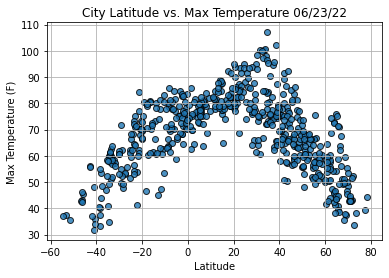

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

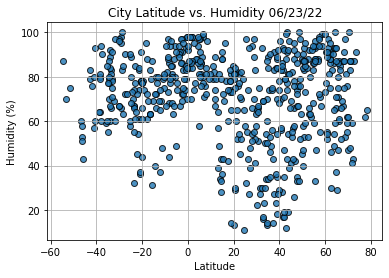

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

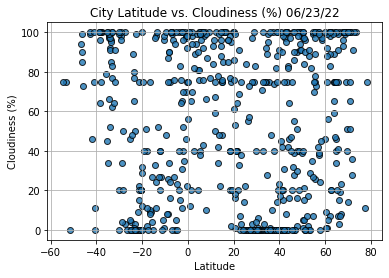

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

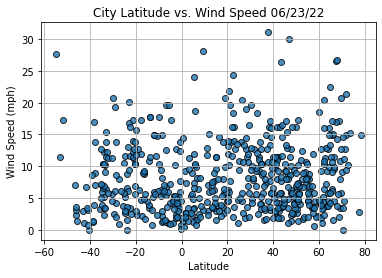

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

### Create a Linear Regression

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                       Muncar
Country                        ID
Date          2022-06-22 23:34:41
Lat                       -8.4333
Lng                      114.3333
Max Temp                    78.58
Humidity                       86
Cloudiness                     90
Wind Speed                   8.14
Name: 13, dtype: object

#### Separate data into a Northern Hemisphere DataFrame and a Southern Hemisphere DataFrame

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Create Visualizations for Maximum Temperature, Humidity, Cloudiness, and Wind Speed for Each Hemisphere

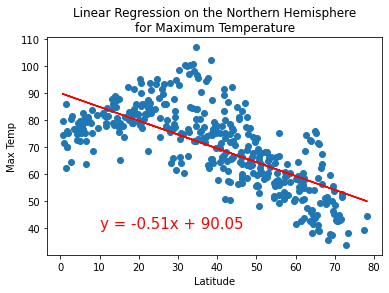

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

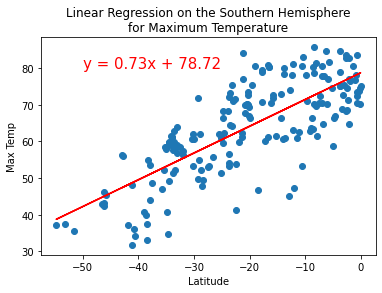

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,80))

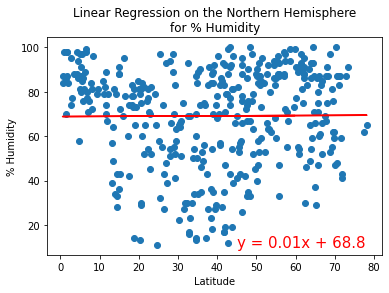

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(45,10))

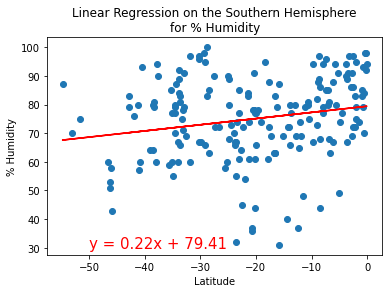

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,30))

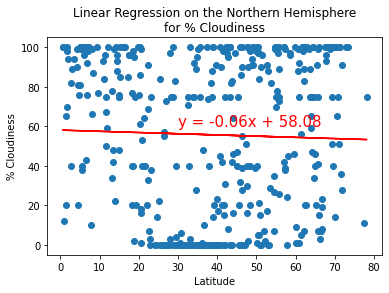

In [67]:
# Linear regression on the Northern Hemisphere %Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(30,60))

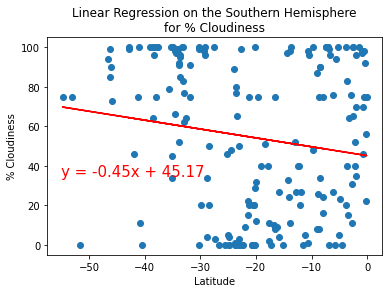

In [77]:
# Linear regression on the Southern Hemisphere %Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-55,35))

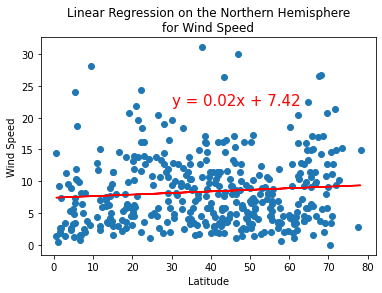

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(30,22))

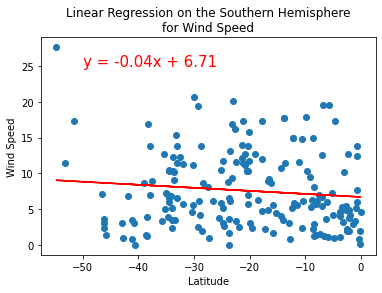

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,25))